In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# Check the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing

Handling Missing Data: 

In [4]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with the most frequent value (mode)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify the missing values are handled
print(df.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [5]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define the target (price) and features
X = df.drop('SalePrice', axis=1)  # Features (all columns except SalePrice)
y = df['SalePrice']  # Target (SalePrice)

# Splitting the Data

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building the Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


# Training the model

In [8]:
model.fit(X_train, y_train)


LinearRegression()

# Predictions

In [9]:
y_pred = model.predict(X_test)


# Evaluating the Model

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 2642483715.194156
Root Mean Squared Error (RMSE): 51405.094253334035
R-squared: 0.6554926552252578


#  Visualizing the Results

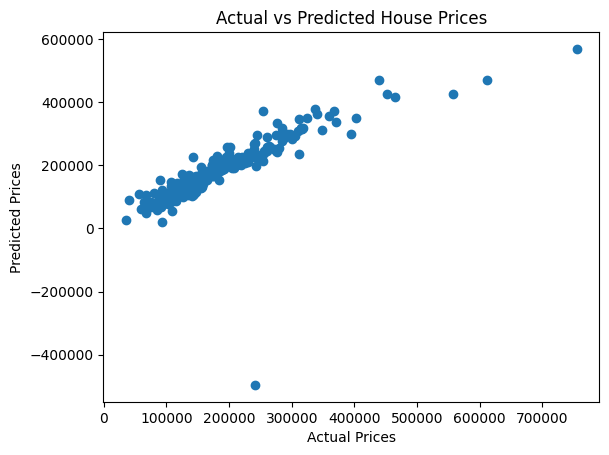

In [11]:
import matplotlib.pyplot as plt

# Plot the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


#  Cross-Validation

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation for RandomForest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Mean MSE from cross-validation
mean_cv_score = -cv_scores.mean()

print(f"Mean Cross-Validation MSE: {mean_cv_score}")


Mean Cross-Validation MSE: 920686971.4163166


# Hyperparameter Tuning and Model Improvement

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Squared Error (MSE): 803842286.9341656
Random Forest - Root Mean Squared Error (RMSE): 28352.112565630196
Random Forest - R-squared: 0.8952010298882774


In [14]:
import seaborn as sns

# Assuming rf_model is the trained RandomForestRegressor model
# and X_train, y_train are the training data, and X_test, y_test are the test data.

# Predict on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


In [15]:
# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print performance metrics
print(f"Random Forest - Training Mean Squared Error (MSE): {train_mse}")
print(f"Random Forest - Training Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Random Forest - Training R-squared: {train_r2}")
print(f"Random Forest - Test Mean Squared Error (MSE): {test_mse}")
print(f"Random Forest - Test Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Random Forest - Test R-squared: {test_r2}")


Random Forest - Training Mean Squared Error (MSE): 126996042.99610603
Random Forest - Training Root Mean Squared Error (RMSE): 11269.252104558936
Random Forest - Training R-squared: 0.9787081951010376
Random Forest - Test Mean Squared Error (MSE): 803842286.9341656
Random Forest - Test Root Mean Squared Error (RMSE): 28352.112565630196
Random Forest - Test R-squared: 0.8952010298882774


# Actual vs Predicted Plot (for test data)

This scatter plot compares the actual values (y_test) against the predicted values (y_test_pred) from the model. The red line represents perfect predictions, helping you visually assess the model's accuracy.

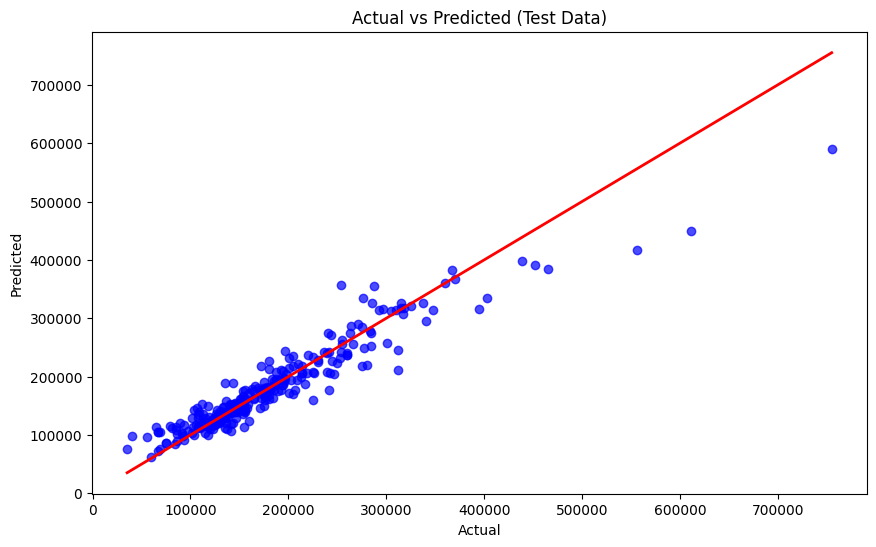

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted (Test Data)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Residual Plot (for test data) 

This plot shows the difference between the actual and predicted values (residuals) to help you analyze how well the model is performing. A well-fit model will have residuals randomly scattered around 0.

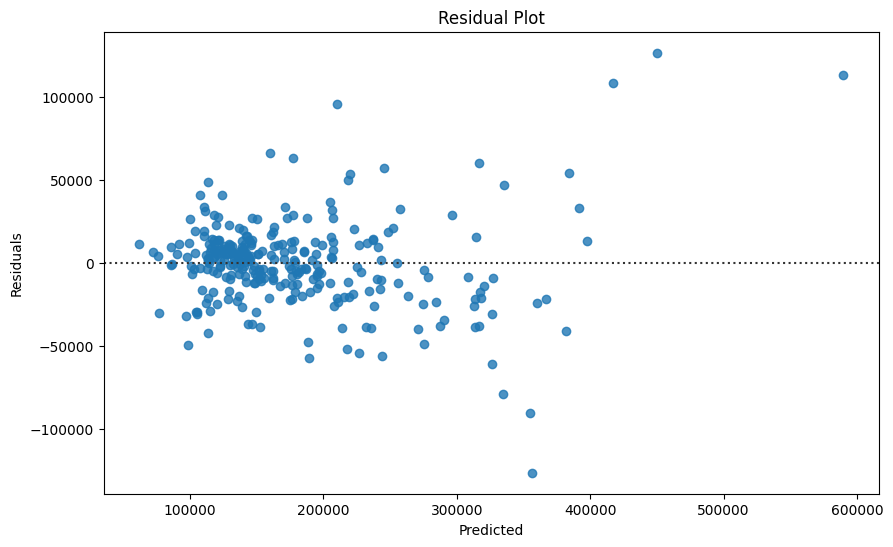

In [26]:
# Residual Plot (for test data) without LOWESS smoothing
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, lowess=False, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()
